<a href="https://colab.research.google.com/github/Monabellee/BigData/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Загрузим датасет с данными о миллиардерах. Мы загружаем этот набор данных из CSV и определяем имена миллиардеров нашим индексом.

In [2]:
billion_df = pd.read_csv("Billionaires.csv", index_col ="Name")

In [ ]:
billion_df.head()

,Rank,Net Worth,Age,Country | Territory,Source,Industry
Name,,,,,,
Bernard Arnault & family,1,$211 B,74.0,France,LVMH,Fashion & Retail
Elon Musk,2,$180 B,51.0,United States,"Tesla, SpaceX",Automotive
Jeff Bezos,3,$114 B,59.0,United States,Amazon,Technology
Larry Ellison,4,$107 B,78.0,United States,Oracle,Technology
Warren Buffett,5,$106 B,92.0,United States,Berkshire Hathaway,Finance & Investments


In [ ]:
billion_df.info()
billion_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, Bernard Arnault & family to Inigo Zobel
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 2640 non-null   int64  
 1   Net Worth            2640 non-null   object 
 2   Age                  2576 non-null   float64
 3   Country | Territory  2640 non-null   object 
 4   Source               2640 non-null   object 
 5   Industry             2640 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 208.9+ KB


(2640, 6)

In [3]:
billion_df.duplicated().sum()

26

In [4]:
billion_df.drop_duplicates(inplace=True)
billion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2614 entries, Bernard Arnault & family to Inigo Zobel
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 2614 non-null   int64  
 1   Net Worth            2614 non-null   object 
 2   Age                  2560 non-null   float64
 3   Country | Territory  2614 non-null   object 
 4   Source               2614 non-null   object 
 5   Industry             2614 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 143.0+ KB


In [5]:
billion_df.isnull().sum()

Rank                    0
Net Worth               0
Age                    54
Country | Territory     0
Source                  0
Industry                0
dtype: int64

Опишем столбец Country | Territory. Делаем вывод, что больше всего миллиардеров из США

In [ ]:
stat = billion_df['Country | Territory'].describe()
print(stat)

count              2614
unique               77
top       United States
freq                729
Name: Country | Territory, dtype: object


Опишем столбец Age. Сделаем вывод, что средний возраст миллиардеров - 65 лет.

In [ ]:
stat = billion_df['Age'].describe()
print(stat)

count    2560.000000
mean       65.163281
std        13.272444
min        18.000000
25%        56.000000
50%        65.000000
75%        75.000000
max       101.000000
Name: Age, dtype: float64


In [ ]:
billion_df[['Age', 'Net Worth']]

,Age,Net Worth
Name,,
Bernard Arnault & family,74.0,$211 B
Elon Musk,51.0,$180 B
Jeff Bezos,59.0,$114 B
Larry Ellison,78.0,$107 B
Warren Buffett,92.0,$106 B
...,...,...
Yu Rong,51.0,$1 B
"Richard Yuengling, Jr.",80.0,$1 B
Zhang Gongyun,60.0,$1 B


In [ ]:
billion_df['Country | Territory'].value_counts(normalize=True)

United States    0.278883
China            0.184774
India            0.064269
Germany          0.046672
Russia           0.039786
                   ...   
Liechtenstein    0.000383
Guernsey         0.000383
Iceland          0.000383
Algeria          0.000383
Panama           0.000383
Name: Country | Territory, Length: 77, dtype: float64

In [12]:
def df_country(country):
  return billion_df[billion_df['Country | Territory'] == country]

In [ ]:
df_US = df_country('United States')
print(df_US)

                        Rank Net Worth   Age Country | Territory  \
Name                                                               
Elon Musk                  2    $180 B  51.0       United States   
Jeff Bezos                 3    $114 B  59.0       United States   
Larry Ellison              4    $107 B  78.0       United States   
Warren Buffett             5    $106 B  92.0       United States   
Bill Gates                 6    $104 B  67.0       United States   
...                      ...       ...   ...                 ...   
George Sakellaris       2540      $1 B  76.0       United States   
Neerja Sethi            2540      $1 B  68.0       United States   
Scott Smith             2540      $1 B  73.0       United States   
David Tran & family     2540      $1 B  77.0       United States   
Richard Yuengling, Jr.  2540      $1 B  80.0       United States   

                                            Source               Industry  \
Name                                  

Найдем средний возраст миллиардеров в США

In [ ]:
df_US['Age'].mean()

67.87379972565158

Выведем информацию о российских миллиардерах

In [ ]:
df_Rus = df_country('Russia')
print(df_Rus)

                             Rank Net Worth   Age Country | Territory  \
Name                                                                    
Andrey Melnichenko & family    58   $25.2 B  51.0              Russia   
Vladimir Potanin               62   $23.7 B  62.0              Russia   
Vladimir Lisin                 70   $22.1 B  66.0              Russia   
Leonid Mikhelson & family      72   $21.6 B  67.0              Russia   
Alexey Mordashov & family      79   $20.9 B  57.0              Russia   
...                           ...       ...   ...                 ...   
Arkady Volozh                2405    $1.1 B  59.0              Russia   
Lev Kvetnoi                  2540      $1 B  57.0              Russia   
Andrei Molchanov             2540      $1 B  51.0              Russia   
Ivan Streshinsky             2540      $1 B  53.0              Russia   
Sergei Sudarikov             2540      $1 B  51.0              Russia   

                                             Sourc

Найдем индустрию, в которой больше всего миллиардеров в России

In [ ]:
df_Rus['Industry'].value_counts().idxmax()

'Metals & Mining'

Выведем информацию о самом молодом миллиардере в России

In [ ]:
stat = df_Rus[df_Rus['Age'] == df_Rus['Age'].min()]
print(stat)
#df_Rus['Age'].min()

                Rank Net Worth   Age Country | Territory               Source  \
Name                                                                            
Said Gutseriev  2405    $1.1 B  34.0              Russia  Retail, investments   

               Industry  Worth  
Name                            
Said Gutseriev   Energy    1.1  


Создадим функцию замены типа данных столбца Net Worth

In [6]:
def convert_currency(val):
    new_val = val.replace('B', '').replace('$', '')
    return float(new_val)

In [7]:
billion_df['Net Worth'].apply(convert_currency)

Name
Bernard Arnault & family    211.0
Elon Musk                   180.0
Jeff Bezos                  114.0
Larry Ellison               107.0
Warren Buffett              106.0
                            ...  
Yu Rong                       1.0
Richard Yuengling, Jr.        1.0
Zhang Gongyun                 1.0
Zhang Guiping & family        1.0
Inigo Zobel                   1.0
Name: Net Worth, Length: 2614, dtype: float64

In [8]:
billion_df['Worth'] = billion_df['Net Worth'].apply(convert_currency)
print(billion_df)

                          Rank Net Worth   Age Country | Territory  \
Name                                                                 
Bernard Arnault & family     1    $211 B  74.0              France   
Elon Musk                    2    $180 B  51.0       United States   
Jeff Bezos                   3    $114 B  59.0       United States   
Larry Ellison                4    $107 B  78.0       United States   
Warren Buffett               5    $106 B  92.0       United States   
...                        ...       ...   ...                 ...   
Yu Rong                   2540      $1 B  51.0               China   
Richard Yuengling, Jr.    2540      $1 B  80.0       United States   
Zhang Gongyun             2540      $1 B  60.0               China   
Zhang Guiping & family    2540      $1 B  71.0               China   
Inigo Zobel               2540      $1 B  66.0         Philippines   

                                                Source               Industry  \
Name    

<function matplotlib.pyplot.show(close=None, block=None)>

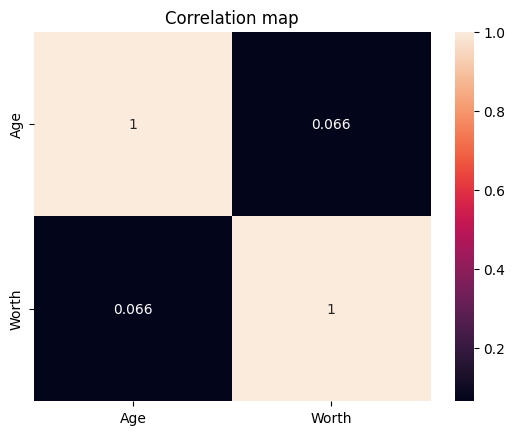

In [17]:
selected = ['Age', 'Worth']
selected_data = billion_df[selected]
corr_matrix = selected_data.corr()
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation map')
plt.show

#plt.imshow(billion_df.corr())

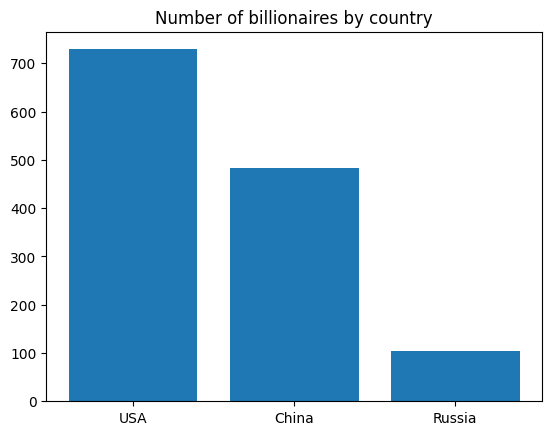

In [15]:
country = ['USA','China','Russia']
c1 = len(df_country('United States'))
c2 = len(df_country('China'))
c3 = len(df_country('Russia'))
count = [c1,c2,c3]
plt.title("Number of billionaires by country")

plt.bar(country, count)
plt.show()

In [20]:
billion_df['Industry'].value_counts(normalize=True)

Finance & Investments         0.140015
Manufacturing                 0.121653
Technology                    0.118592
Fashion & Retail              0.100995
Food & Beverage               0.080337
Healthcare                    0.076511
Real Estate                   0.073451
Diversified                   0.071155
Energy                        0.038256
Media & Entertainment         0.034430
Metals & Mining               0.028309
Automotive                    0.027544
Service                       0.020275
Construction & Engineering    0.016832
Logistics                     0.015302
Sports                        0.014920
Telecom                       0.011859
Gambling & Casinos            0.009564
Name: Industry, dtype: float64

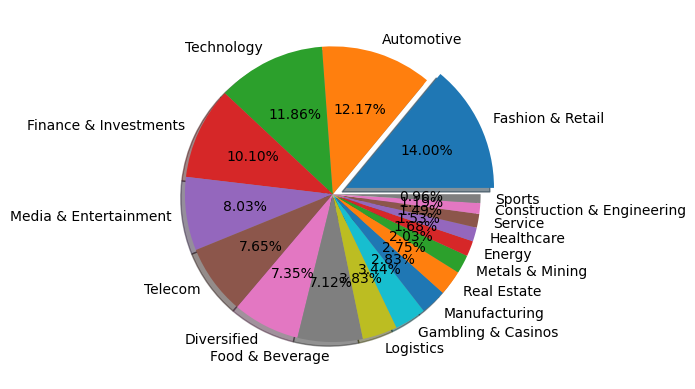

In [21]:
data = billion_df['Industry'].value_counts(normalize=True)
labels = billion_df['Industry'].unique()
explode = [0.1, 0.0, 0.0,
           0.0,0.0,0.0,
           0.0,0.0,0.0,
           0.0,0.0,0.0,
           0.0,0.0,0.0,
           0.0,0.0,0.0]
plt.pie(data,
        labels=labels,
        explode=explode,
        shadow=True,
        autopct='%.2f%%')

plt.show()